# 1. Install and Import Dependencies

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import random
import os
from sklearn.model_selection import train_test_split
import shutil


In [ ]:
torch.cuda.is_available()

# 2. Load Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [ ]:
model

# 3. Make Detections with Images

In [ ]:
img = '../images/train/000074.jpg'

In [ ]:
results = model(img)
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4. Data management


In [22]:
shape = (1920,1080)
img_h = shape[1]
img_w = shape[0]

In [31]:
img_h

1080

## 4.1 Data Yolo

In [ ]:
direct = '../SNMOT_yolo/'
drop = ['frame', 'unk1','acc', 'ball_check']
for i in range(1,750):
    file = direct + 'SNMOT-0_{}'.format(i) + '.txt'
    df=pd.read_csv(file, sep=' ').astype(float)
    for j in range(len(df)):
        height = df.iloc[j]['height']
        width = df.iloc[j]['width']
        x = df.iloc[j]['x_cord']
        y = df.iloc[j]['y_cord']
        x_c = x+float(width/2)
        y_c = y+float(height/2)
        df.iloc[j]['x_cord'] = float(x_c/img_w)
        df.iloc[j]['y_cord'] = float(y_c/img_h)
        df.iloc[j]['height'] = float(height/img_h)
        df.iloc[j]['width'] = float(width/img_w)
        if height < 30 and width < 30:
            df.iloc[j]['team_label'] = 0
        else:
            if df.iloc[j]['team_label'] == 0 and df.iloc[j]['ball_check'] == -1:
                df.iloc[j]['team_label'] = 3
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    df = df.drop(columns = drop)
    np.savetxt(('labels/{}.txt'.format(str(i).zfill(6))),df.values,
    fmt='%i %1.6f %1.6f %1.6f %1.6f')


## 4.2 Data normal


In [ ]:

direct = 'proj_det/'
drop = ['frame', 'unk1','acc']

file = direct + 'det.txt'
df=pd.read_csv(file, sep=',').astype(float)
for i in range(1,751):
    df2 = df[df['frame']==i]
    for j in range(len(df2)):
        height = df2.iloc[j]['height']
        width = df2.iloc[j]['width']
        x = df2.iloc[j]['x_cord']
        y = df2.iloc[j]['y_cord']
        x_c = x+float(width/2)
        y_c = y+float(height/2)
        df2.iloc[j]['x_cord'] = float(x_c/img_w)
        df2.iloc[j]['y_cord'] = float(y_c/img_h)
        df2.iloc[j]['height'] = float(height/img_h)
        df2.iloc[j]['width'] = float(width/img_w)
        if df2.iloc[j]['ball_check'] != 1:
            df2.iloc[j]['ball_check'] = 0
        else:
            df2.iloc[j]['ball_check'] = 1
    cols = df2.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df2 = df2[cols]
    df2 = df2.drop(columns = drop)
    np.savetxt(('labels/{}.txt'.format(str(i).zfill(6))),df2.values,
    fmt='%i %1.6f %1.6f %1.6f %1.6f')

In [15]:
!cd 116/

In [16]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 6A0D-3F3D

 Directory of c:\Users\mirun\OneDrive\Desktop\ivan\DL_YOLO - 2 - ref

06/12/2022  13:40    <DIR>          .
06/12/2022  13:40    <DIR>          ..
06/12/2022  13:40    <DIR>          116
06/12/2022  13:33    <DIR>          img1_061
06/12/2022  13:36    <DIR>          SNMOT_yolo_061
06/12/2022  13:46           355,571 YOLO.ipynb
20/11/2022  16:15        14,808,437 yolov5s.pt
               2 File(s)     15,164,008 bytes
               5 Dir(s)   2,672,951,296 bytes free


In [31]:
num = '1'

In [38]:

direct = str(num) + '/det/'
drop = ['Unnamed: 0','frame', 'unk1','acc', 'ball_check']

file = direct + 'det.txt'
df=pd.read_csv(file, sep=',').astype(float)
for i in range(1,751):
    df2 = df[df['frame']==i]
    for j in range(len(df2)):
        height = df2.iloc[j]['height']
        width = df2.iloc[j]['width']
        x = df2.iloc[j]['x_cord']
        y = df2.iloc[j]['y_cord']
        x_c = x+float(width/2)
        y_c = y+float(height/2)
        df2.iloc[j]['x_cord'] = float(x_c/img_w)
        df2.iloc[j]['y_cord'] = float(y_c/img_h)
        df2.iloc[j]['height'] = float(height/img_h)
        df2.iloc[j]['width'] = float(width/img_w)
        if df2.iloc[j]['ball_check'] == 1:
            df2.iloc[j]['team_label'] = 0
            df2.iloc[j]['height'] = df2.iloc[j]['height']*1.75
            df2.iloc[j]['width'] = df2.iloc[j]['width']*1.75
        else:
            if df2.iloc[j]['team_label'] == 0:
                df2.iloc[j]['team_label'] = 3
    df2 = df2.drop(columns = drop)
    cols = df2.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df2 = df2[cols]
    # np.savetxt(('det2/{}.txt'.format(str(i).zfill(6))),df2.values,
    np.savetxt((str(num) + '/labels/{}.txt'.format(str(i).zfill(6))),df2.values,
    fmt='%i %1.6f %1.6f %1.6f %1.6f')



## 4.3 New annotations

In [7]:
num = '114'
range_ini = 350
range_fin = 400

In [42]:
files = num + '/img1/'
dest = 'good/' + num + '/images/' 
imag = [os.path.join(files, x) for x in os.listdir(files)]
for i in imag[range_ini:range_fin]:
    # os.rename(i,('img1/{}.jpg'.format(str(int(i[5:-4])+750).zfill(6))))
    shutil.move(i,dest)





In [43]:
files = num + '/labels/'
dest = 'good/' + num + '/labels/' 
imag = [os.path.join(files, x) for x in os.listdir(files)]
for i in imag[range_ini:range_fin]:
    # os.rename(i,('img1/{}.jpg'.format(str(int(i[5:-4])+750).zfill(6))))
    shutil.move(i,dest)

### 4.3.1 Visual Annotate correctly


In [41]:
num = '195'
range_ini = 2
range_fin = 35

In [3]:
files = num + '/labels/'
dest = 'good/' + num + '/labels/' 
labels = [os.path.join(files, x) for x in os.listdir(files)]
for i in labels[range:range_fin]:
    False

In [47]:
class_name_to_id_mapping = {"ball": 0,
                           "team_1": 1,
                           "team_2" : 2,
                           "ref" : 3}

In [48]:
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

font = ImageFont.truetype('arial.ttf', size=30)

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    count = 0
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)),width=4, outline='red')
        
        plotted_image.text((x0, y0 - 30), str(count),font= font)
        count += 1
    plt.imshow(np.array(image))
    plt.show()

In [ ]:
annotations = [os.path.join('good/' + num + '/labels/', x) for x in os.listdir('good/' + num + '/labels/')]
for i in range(len(annotations)):
    annotation_file = annotations[i+31]
    print(annotation_file)
    with open(annotation_file, "r") as file:
        annotation_list = file.read().split("\n")[:-1]
        annotation_list = [x.split(" ") for x in annotation_list]
        annotation_list = [[float(y) for y in x ] for x in annotation_list]

    #Get the corresponding image file
    image_file = annotation_file.replace("labels/", "images/").replace("txt", "jpg")
    print(image_file)
    assert os.path.exists(image_file)

    #Load the image
    image = Image.open(image_file)


    #Plot the Bounding Box
    plot_bounding_box(image, annotation_list)

### 4.3.2 New ann

In [3]:
g_labels = [2,
3,
2,
1,
2,
1,
2,
2,
1,
2,
1,
3,
2,
1,
2]
ini = 36
fin = 35
num = '195'
print(num)

195


In [44]:
for i in range(ini,fin+1):
    file = 'good/' + num + '/labels/{}.txt'.format(str(i).zfill(6))
    names = ['label', 'x', 'y', 'width', 'height']
    df=pd.read_csv(file, sep=' ', names=names).astype(float)
    df['label'] = g_labels
    np.savetxt(file,df.values,
    fmt='%i %1.6f %1.6f %1.6f %1.6f')


## 4.4 Visualize

In [1]:
class_name_to_id_mapping = {"ball": 0,
                           "team_1": 1,
                           "team_2" : 2,
                           "ref" : 3}

In [6]:
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

font = ImageFont.truetype('arial.ttf', size=30)

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)),width=4, outline='red')
        
        plotted_image.text((x0, y0 - 30), class_id_to_name_mapping[(int(obj_cls))],font= font)
    
    plt.imshow(np.array(image))
    plt.show()

good/195/labels/000015.txt
good/195/images/000015.jpg


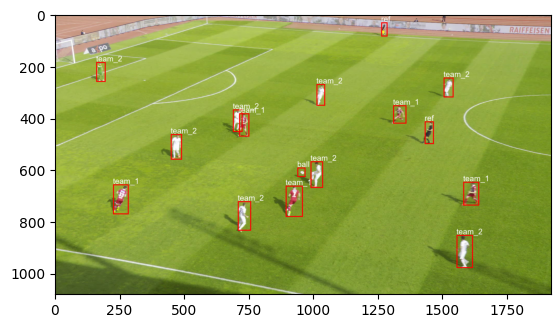

In [20]:
annotations = [os.path.join('good/' + num + '/labels/', x) for x in os.listdir('good/' + num + '/labels/')]
annotation_file = random.choice(annotations)
# annotation_file = annotations[-1]
print(annotation_file)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels/", "images/").replace("txt", "jpg")
print(image_file)
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)


#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

### 4.5 Good to labels and images

In [67]:
num = '195'
minus = 2
plus = 50*5


In [69]:
dest = 'images/'
files = 'good/' + num + '/images/' 
imag = [os.path.join(files, x) for x in os.listdir(files)]
for i in imag:
    # os.rename(i,(files + '{}.jpg'.format(str(int(i[-10:-4])-minus + plus).zfill(6))))
    shutil.copy(i,dest)





In [71]:
dest = 'labels/'
files = 'good/' + num + '/labels/' 
labels = [os.path.join(files, x) for x in os.listdir(files)]
for i in labels:
    # os.rename(i,(files + '{}.txt'.format(str(int(i[-10:-4])-minus + plus).zfill(6))))
    shutil.copy(i,dest)

labels/train\000100.txt
images/train\000100.jpg


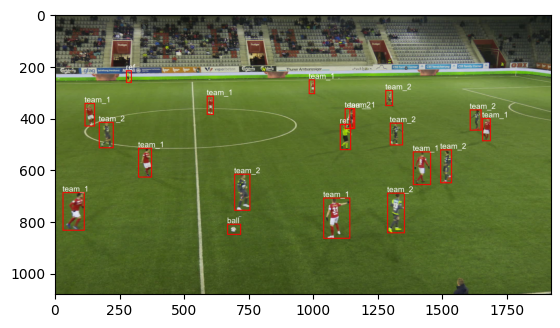

In [151]:
annotations = [os.path.join('labels/train', x) for x in os.listdir('labels/train')]
annotation_file = random.choice(annotations)
# annotation_file = annotations[-1]
print(annotation_file)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels/", "images/").replace("txt", "jpg")
print(image_file)
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)


#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [291]:
%cd ..

c:\Users\mirun\OneDrive\Desktop\DL_YOLO - 2 - ref


## PARTITION

In [292]:
images = [os.path.join('images', x) for x in os.listdir('images')]
annotations = [os.path.join('labels', x) for x in os.listdir('labels') if x[-3:] == "txt"]

images.sort()
annotations.sort()
images
# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [293]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train/')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'labels/train/')
move_files_to_folder(val_annotations, 'labels/val/')
move_files_to_folder(test_annotations, 'labels/test/')

# 5. Train from scratch

In [78]:
%cd yolov5

c:\Users\mirun\OneDrive\Desktop\ivan\DL_YOLO - 2\yolov5


In [ ]:
!python train.py --cfg yolov5s.yaml --batch 30 --epochs 10 --data Teams.yaml --weights yolov5s.pt --name yolo_teams   

# 6. Load Custom Model

In [339]:
%cd ..

c:\Users\mirun\OneDrive\Desktop\DL_YOLO - 2 - ref


In [341]:
images_veo = [os.path.join('VEO', x) for x in os.listdir('VEO')]


In [2]:
%cd yolov5

c:\Users\mirun\OneDrive\Desktop\DL_YOLO - 2 - ref\yolov5


In [5]:
!python detect.py --source ../images/test --weights runs/train/yolo_ref20/weights/best.pt --conf 0.25 --name yolo_teams_det   

detect: weights=['runs/train/yolo_ref20/weights/best.pt'], source=../images/test, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=yolo_teams_det, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\mirun\OneDrive\Desktop\DL_YOLO': No such file or directory
YOLOv5  2022-11-20 Python-3.10.0 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1660 Ti with Max-Q Design, 6144MiB)

Fusing layers... 
YOLOv5n summary: 157 layers, 1764577 parameters, 0 gradients, 4.1 GFLOPs
image 1/25 C:\Users\mirun\OneDrive\Desktop\DL_YOLO - 2 - ref\images\test\000000.jpg: 384x640 9 team_1s, 9 team_2s, 1 ref, 14.5ms
image 2/25 C:\Users\mirun\OneDrive\Desktop\DL_YOLO - 2 - ref\images\test\000018.jpg

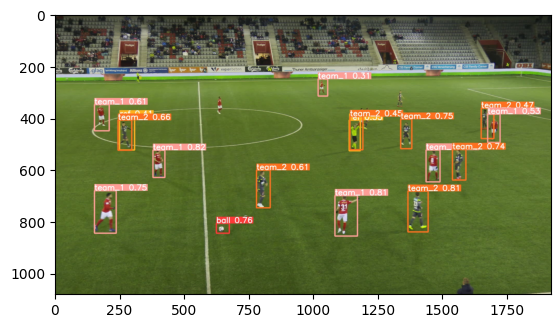

In [16]:
detections_dir = "runs/detect/yolo_teams_det29/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [ ]:
%python test.py --weights runs/train/yolo_teams_det3/weights/best.pt --data Teams.yaml --task test --name yolo_det